<a href="https://colab.research.google.com/github/Geeth-Rath/HeartDiseasesPredictionModel/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=31dca2d4c88ae43351d1e04272c693ed4338fd25c5e8ee7ecf7fc403932eb4af
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [25]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
from pyspark.sql.functions import col, desc, when

# Create Spark session
spark = SparkSession.builder.appName("HeartDiseaseAnalysis").getOrCreate()

# Define the schema for the dataset
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("sex", IntegerType(), True),
    StructField("chest_pain_type", IntegerType(), True),
    StructField("resting_blood_pressure", IntegerType(), True),
    StructField("serum_cholesterol", IntegerType(), True),
    StructField("fasting_blood_sugar", IntegerType(), True),
    StructField("resting_electrocardiographic_results", IntegerType(), True),
    StructField("max_heart_rate_achieved", IntegerType(), True),
    StructField("exercise_induced_angina", IntegerType(), True),
    StructField("oldpeak", IntegerType(), True),
    StructField("slope", IntegerType(), True),
    StructField("num_major_vessels", IntegerType(), True),
    StructField("thal", IntegerType(), True),
    StructField("target", IntegerType(), True)
])

# Load the CSV file into a Spark DataFrame
df = spark.read.csv("/content/heart.csv", header=True, schema=schema)

# # Load the CSV file 
# df = spark.read.csv("/content/heart.csv", header=True, inferSchema=True )

# Show the rows of the DataFrame
df.show(truncate=False)

+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-------+-----+-----------------+----+------+
|age|sex|chest_pain_type|resting_blood_pressure|serum_cholesterol|fasting_blood_sugar|resting_electrocardiographic_results|max_heart_rate_achieved|exercise_induced_angina|oldpeak|slope|num_major_vessels|thal|target|
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-------+-----+-----------------+----+------+
|52 |1  |0              |125                   |212              |0                  |1                                   |168                    |0                      |1      |2    |2                |3   |0     |
|53 |1  |0              |140                   |203              |1                  |0                                   |155          

In [3]:
# get attribute schema
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- chest_pain_type: integer (nullable = true)
 |-- resting_blood_pressure: integer (nullable = true)
 |-- serum_cholesterol: integer (nullable = true)
 |-- fasting_blood_sugar: integer (nullable = true)
 |-- resting_electrocardiographic_results: integer (nullable = true)
 |-- max_heart_rate_achieved: integer (nullable = true)
 |-- exercise_induced_angina: integer (nullable = true)
 |-- oldpeak: integer (nullable = true)
 |-- slope: integer (nullable = true)
 |-- num_major_vessels: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



check null values

In [4]:
from pyspark.sql.functions import col, sum

# Assuming the DataFrame is named "df"
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Display the null counts
null_counts.show()


+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-------+-----+-----------------+----+------+
|age|sex|chest_pain_type|resting_blood_pressure|serum_cholesterol|fasting_blood_sugar|resting_electrocardiographic_results|max_heart_rate_achieved|exercise_induced_angina|oldpeak|slope|num_major_vessels|thal|target|
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-------+-----+-----------------+----+------+
|  0|  0|              0|                     0|                0|                  0|                                   0|                      0|                      0|    584|    0|                0|   0|     0|
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-------------

In [5]:
#drop oldpeak colum as it has 584 null values
df = df.drop("oldpeak")
df.show()

+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-----+-----------------+----+------+
|age|sex|chest_pain_type|resting_blood_pressure|serum_cholesterol|fasting_blood_sugar|resting_electrocardiographic_results|max_heart_rate_achieved|exercise_induced_angina|slope|num_major_vessels|thal|target|
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-----+-----------------+----+------+
| 52|  1|              0|                   125|              212|                  0|                                   1|                    168|                      0|    2|                2|   3|     0|
| 53|  1|              0|                   140|              203|                  1|                                   0|                    155|                     

 check duplicates

In [6]:
from pyspark.sql.functions import col

# Assuming that the DataFrame is already loaded and named as 'df'
num_duplicates = df.count() - df.dropDuplicates().count()
num_duplicates
print("Number of duplicates in the DataFrame: ", num_duplicates)


# Remove duplicates
df.distinct()
df.show(truncate=False)

Number of duplicates in the DataFrame:  723
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-----+-----------------+----+------+
|age|sex|chest_pain_type|resting_blood_pressure|serum_cholesterol|fasting_blood_sugar|resting_electrocardiographic_results|max_heart_rate_achieved|exercise_induced_angina|slope|num_major_vessels|thal|target|
+---+---+---------------+----------------------+-----------------+-------------------+------------------------------------+-----------------------+-----------------------+-----+-----------------+----+------+
|52 |1  |0              |125                   |212              |0                  |1                                   |168                    |0                      |2    |2                |3   |0     |
|53 |1  |0              |140                   |203              |1                  |0                                   |1

Analysis of the data set

In [7]:
df.describe().toPandas()

,summary,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,slope,num_major_vessels,thal,target
0,count,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
1,mean,54.43414634146342,0.6956097560975609,0.9424390243902439,131.61170731707318,246.0,0.14926829268292682,0.5297560975609756,149.11414634146342,0.33658536585365856,1.3853658536585365,0.7541463414634146,2.32390243902439,0.5131707317073171
2,stddev,9.072290233244278,0.4603733241196495,1.029640743645865,17.516718005376408,51.59251020618203,0.35652668972715756,0.5278775668748918,23.00572374597721,0.4727723760037115,0.6177552671745918,1.0307976650242825,0.6206602380510303,0.5000704980788011
3,min,29,0,0,94,126,0,0,71,0,0,0,0,0
4,max,77,1,3,200,564,1,2,202,1,2,4,3,1


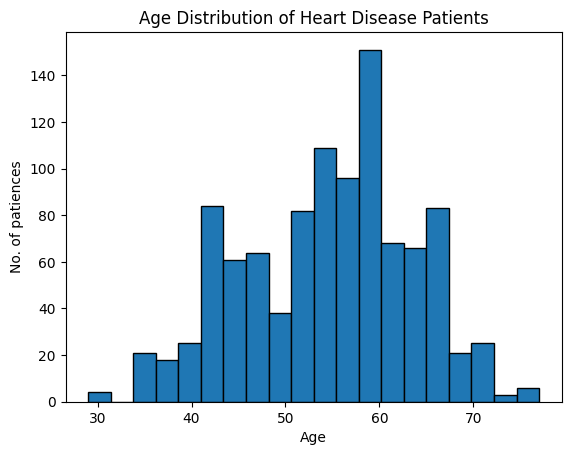

In [8]:
import matplotlib.pyplot as plt

# select the age column and convert it to a Pandas DataFrame
age_df = df.select('age').toPandas()

# create a histogram of the age distribution
plt.hist(age_df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('No. of patiences')
plt.title('Age Distribution of Heart Disease Patients')
plt.show()


Text(0, 0.5, 'No. Patients')

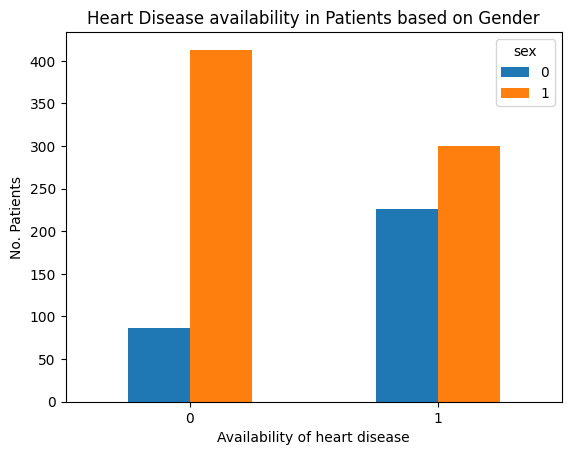

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

# select the sex and target columns and convert them to a Pandas DataFrame
data_df = df.select('sex', 'target').toPandas()

# count the number of each target value for each sex
count_df = data_df.groupby(['sex', 'target']).size().reset_index(name='count')

# pivot the count data to create a grouped bar chart
pivoted_count_df = count_df.pivot(index='target', columns='sex', values='count')

# create a grouped bar chart
pivoted_count_df.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Heart Disease availability in Patients based on Gender')
plt.xlabel('Availability of heart disease')
plt.ylabel('No. Patients')




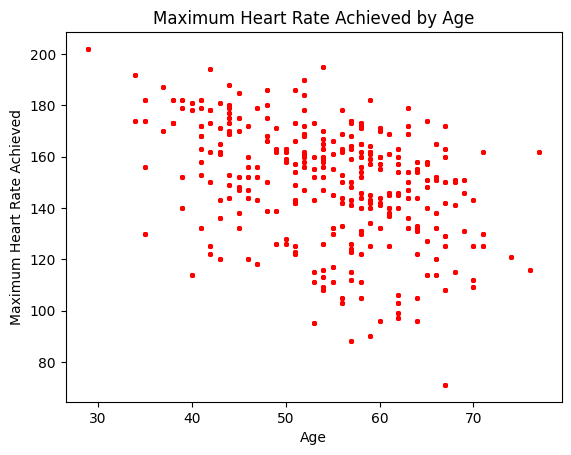

In [11]:
import matplotlib.pyplot as plt

# select the age and max_heart_rate_achieved columns and convert them to a Pandas DataFrame
data_df = df.select('age', 'max_heart_rate_achieved').toPandas()

# create a scatter plot of age versus max_heart_rate_achieved
plt.scatter(data_df['age'], data_df['max_heart_rate_achieved'], color='red', s=7)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Maximum Heart Rate Achieved by Age')
plt.show()


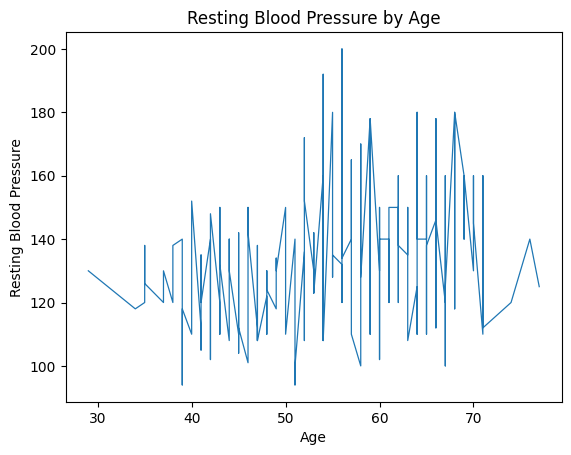

In [35]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.select("age", "resting_blood_pressure").toPandas()

# Sort the Pandas DataFrame by age
pandas_df = pandas_df.sort_values(by=["age"])

# Create a line plot using the Pandas plotting API
plt.plot(pandas_df["age"], pandas_df["resting_blood_pressure"], linewidth=0.9)

# Set the axis labels and title
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Resting Blood Pressure by Age")

# Show the plot
plt.show()





use map reduce

In [22]:
from pyspark import SparkContext

def map_function(row):
    return (row["serum_cholesterol"], 1)

# Create a reduce function that sums up the counts for each serum_cholesterol level
def reduce_function(count1, count2):
    return count1 + count2

# Apply the map and reduce functions to the DataFrame to get the counts for each serum_cholesterol level
counts = df.rdd.map(map_function).reduceByKey(reduce_function)

# Get the top 5 serum_cholesterol levels with the highest number of patients
top_counts = counts.takeOrdered(5, key=lambda x: -x[1])

# Print the results
for i, (level, count) in enumerate(top_counts):
    print(f"{i+1}. Serum cholesterol level {level} has {count} patients.")

1. Serum cholesterol level 204 has 21 patients.
2. Serum cholesterol level 234 has 21 patients.
3. Serum cholesterol level 197 has 19 patients.
4. Serum cholesterol level 212 has 18 patients.
5. Serum cholesterol level 254 has 17 patients.


In [23]:
# Define map function to extract the heart disease status
def extract_status(row):
    status = row["target"]
    return ("heart disease", status)

# Define reduce function to count the number of patients with heart disease
def count_status(a, b):
    return a + b

# MapReduce
status_count = df.rdd.map(extract_status).reduceByKey(count_status)

# Output the results
for status, count in status_count.collect():
    print(status + " patients count: " + str(count))

# Stop Spark context
spark.stop()


heart disease patients count: 526


In [26]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
from pyspark.sql.functions import col, desc, when, avg

# Filter the DataFrame by gender and calculate the average cholesterol level
male_avg_cholesterol = df.filter(col("sex") == 1).agg(avg(col("serum_cholesterol")).alias("male_avg_cholesterol")).collect()[0]["male_avg_cholesterol"]
female_avg_cholesterol = df.filter(col("sex") == 0).agg(avg(col("serum_cholesterol")).alias("female_avg_cholesterol")).collect()[0]["female_avg_cholesterol"]

# Print the results
print("Average cholesterol level for male patients: {:.2f}".format(male_avg_cholesterol))
print("Average cholesterol level for female patients: {:.2f}".format(female_avg_cholesterol))

Average cholesterol level for male patients: 239.24
Average cholesterol level for female patients: 261.46


In [27]:
# Map function to extract the chest pain type and count as 1
def extract_chest_pain_type(row):
    chest_pain_type = row["chest_pain_type"]
    return (chest_pain_type, 1)

# Reduce function to count the number of occurrences of each chest pain type
def count_chest_pain_type(count1, count2):
    return count1 + count2

# Map-reduce operation to find the most common chest pain type
chest_pain_count = df.rdd.map(extract_chest_pain_type).reduceByKey(count_chest_pain_type)

most_common_chest_pain = chest_pain_count.sortBy(lambda x: x[1], ascending=False).first()

print("The most common chest pain type is:", most_common_chest_pain[0])

The most common chest pain type is: 0


Prediction model

In [ ]:
# Import necessary libraries
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Split the dataset into training and testing sets
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=1234)

# Define the feature columns
featureCols = ['age','chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate_achieved', 'exercise_induced_angina', 'num_major_vessels']

# Vectorize the features
assembler = VectorAssembler(inputCols=featureCols, outputCol='features')
trainingData = assembler.transform(trainingData)
testData = assembler.transform(testData)

# Create a logistic regression model
lr = LogisticRegression(featuresCol='features', labelCol='target', maxIter=10)

# Define the hyperparameters to tune
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define the evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='target')

# Define the cross validator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Train the model
cvModel = cv.fit(trainingData)

# Make predictions on the test data
predictions = cvModel.transform(testData)

# Evaluate the model
accuracy = evaluator.evaluate(predictions)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.8258226509845383


In [ ]:
predictions.show()


In [ ]:
# Import necessary libraries
from pyspark.sql.functions import col

# Create a new dataframe with the input data
input_data = [(58,	0,	0,	100,	248,	0,	0,	122,	0,	1,	0,	2,	1)]
# input_data = [(54,	1,	0,	122,	286,	0,	0,	116,	1,	3.2,	1,		2,	0)]
input_df = spark.createDataFrame(input_data, ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate_achieved', 'exercise_induced_angina', 'slope', 'num_major_vessels', 'thal', 'target'  ])

# Vectorize the features of the new dataframe
input_df = assembler.transform(input_df)

# Make predictions on the new dataframe
predictions = cvModel.transform(input_df)

# Print the predictions
predictions.select(col('prediction')).show()




+----------+
|prediction|
+----------+
|       1.0|
+----------+



Co-relation




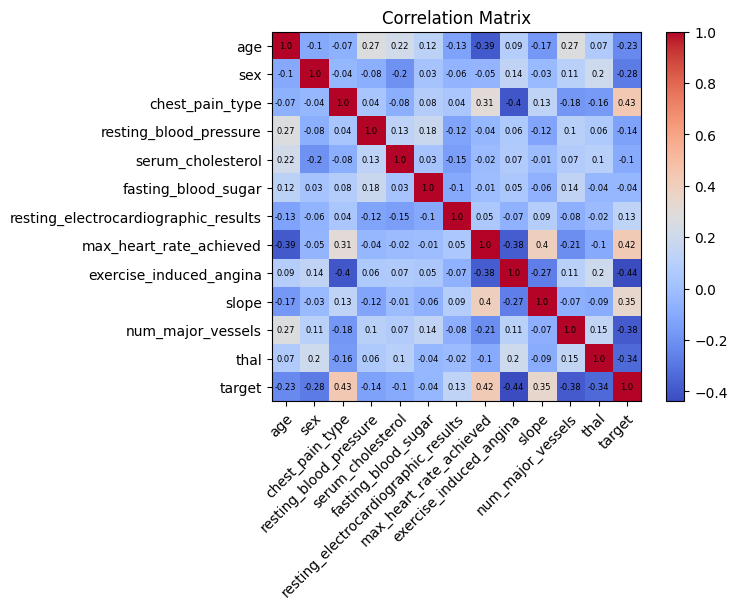

In [ ]:
# Import necessary libraries
from pyspark.sql.functions import corr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix for all columns in the DataFrame
corr_matrix = df.select([corr(col(c1), col(c2)).alias(c1 + '_' + c2) for c1 in df.columns for c2 in df.columns]).collect()[0]

# Create a numpy array from the correlation matrix
corr_array = np.array([corr_matrix[i*len(df.columns):(i+1)*len(df.columns)] for i in range(len(df.columns))])

# Create a figure and axis object
fig, ax = plt.subplots()

# Create heatmap using imshow()
im = ax.imshow(corr_array, cmap='coolwarm')

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))

# Set tick labels
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

# Rotate tick labels and align them properly
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over the data and add annotations
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, str(round(corr_matrix[i*len(df.columns)+j], 2)), ha="center", va="center", color="black",size=6)

# Set title
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()


A negative correlation means that when one attribute increases, the other attribute decreases. For example, serum cholesterol and high-density lipoprotein (HDL) cholesterol are often negatively correlated, as higher levels of serum cholesterol are associated with lower levels of HDL cholesterol.